In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CarPrice=pd.read_csv("CarPrice_Assignment.csv")   #Read the data

In [4]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
CarPrice.info()  #there is no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
#changing the data type as Category
CarPrice['symboling']=CarPrice['symboling'].astype('category',errors='ignore')

In [7]:
#Dropping CarId as its not needed

CarPrice.drop(['car_ID'],axis=1,inplace=True)

In [8]:
#Spliting the car name alone to consider the brand name
CarPrice["Carcompany"]=CarPrice["CarName"].apply(lambda x: x.split(" ")[0])


In [9]:
CarPrice.drop(['CarName'],axis=1,inplace=True)

In [10]:
CarPrice.shape

(205, 25)

In [11]:
CarPrice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
cor=CarPrice.corr()

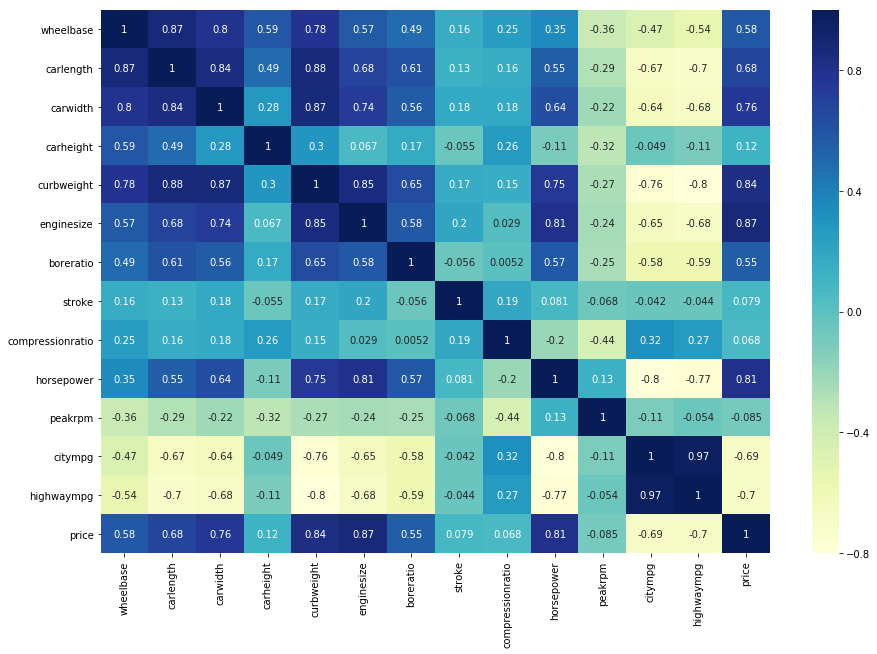

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot = True, cmap="YlGnBu")
plt.show()

In [14]:
#Correcting the CarCompany names

CarPrice.Carcompany[CarPrice.Carcompany== "maxda"] = "mazda"
CarPrice.Carcompany[CarPrice.Carcompany== "porcshce"] = "porsche"
CarPrice.Carcompany[CarPrice.Carcompany== "toyouta"] = "toyota"
CarPrice.Carcompany[CarPrice.Carcompany== "vokswagen"] = "volkswagen"
CarPrice.Carcompany[CarPrice.Carcompany== "vw"] = "volkswagen"
CarPrice.Carcompany[CarPrice.Carcompany== "Nissan"] = "nissan"

#Engine Type

CarPrice.enginetype[CarPrice.enginetype== "dohcv"] = "dohc"

#fuelsystem
CarPrice.fuelsystem[CarPrice.fuelsystem== "spfi"] = "spdi"
CarPrice.fuelsystem[CarPrice.fuelsystem== "mfi"] = "mpfi"


# Visualization Analysis

In [15]:
# for comparision purpose dividing the data into two dfs as below20 and above 20 based on price

below20=CarPrice.loc[CarPrice['price']<20000]
above20=CarPrice.loc[CarPrice['price']>20000]


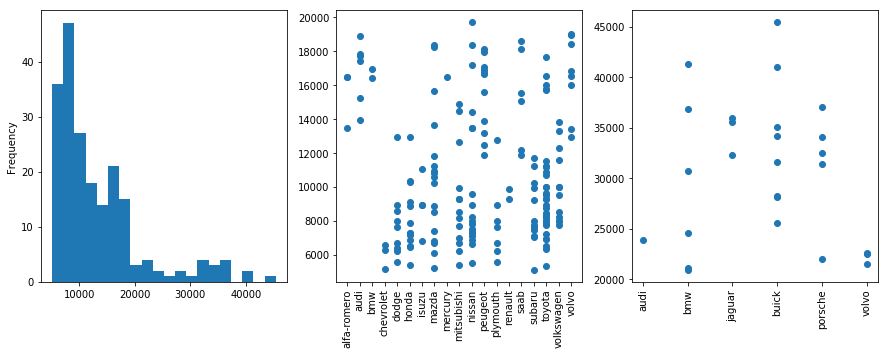

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
CarPrice['price'].plot.hist(bins=20)

plt.subplot(1,3,2)
plt.scatter(x=below20['Carcompany'],y=below20['price'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
plt.scatter(x=above20['Carcompany'],y=above20['price'])
plt.xticks(rotation=90)

plt.show()


According to price histogram, most cars are below 20000.

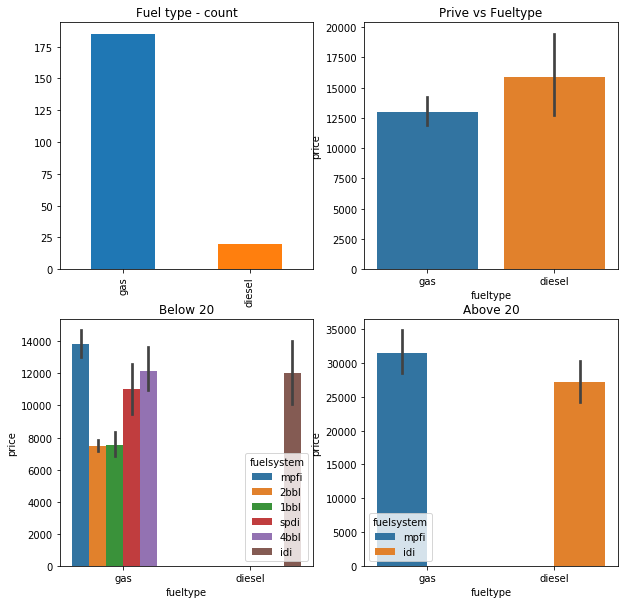

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Fuel type - count")
CarPrice['fueltype'].value_counts().plot('bar')

plt.subplot(2,2,2)
plt.title("Prive vs Fueltype")
sns.barplot(x='fueltype',y='price',data=CarPrice)


plt.subplot(2,2,3)
plt.title("Below 20")
sns.barplot(x='fueltype',y='price',data=below20,hue='fuelsystem')


plt.subplot(2,2,4)
plt.title("Above 20")
sns.barplot(x='fueltype',y='price',data=above20,hue='fuelsystem')
plt.show()

Inference:
    - Number of "Gas" cars are more
    - Even though Gas number is high, when compared with Price, Diesel is higher(i.e) Most priced cars are "Diesel" cars
    - Most cars under Below 20 are gas which has multiple fuelsystem.
    - Above20 cars have either mpfi or idi fuelsystem

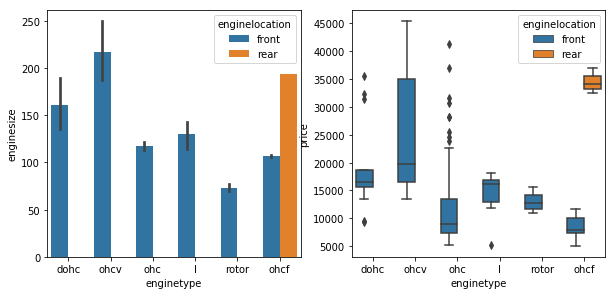

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(x=CarPrice['enginetype'],y=CarPrice['enginesize'],hue=CarPrice['enginelocation'])

plt.subplot(2,2,2)
sns.boxplot(x=CarPrice['enginetype'],y=CarPrice['price'],hue=CarPrice['enginelocation'])


Inference:
    - ohcv enginetype is having high engine size and price as well is high ranging from ~15000 to 45000
    - Rear(ohcf) engine location has the price range

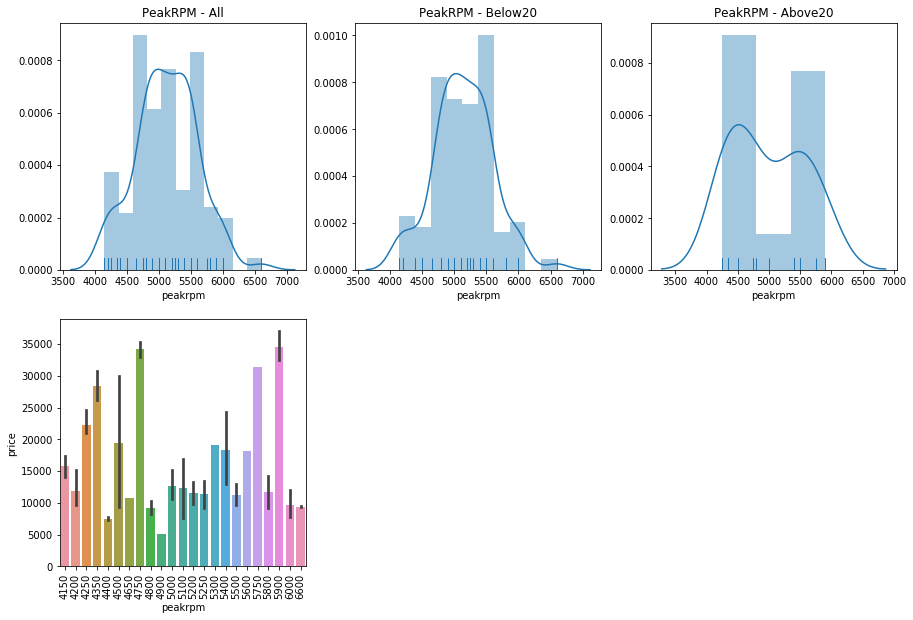

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title("PeakRPM - All")
sns.distplot(CarPrice['peakrpm'],rug=True)

plt.subplot(2,3,2)
plt.title("PeakRPM - Below20")
sns.distplot(below20['peakrpm'],rug=True)

plt.subplot(2,3,3)
plt.title("PeakRPM - Above20")
sns.distplot(above20['peakrpm'],rug=True)

plt.subplot(2,3,4)
y=CarPrice['price'].sort_values()
sns.barplot(x='peakrpm',y=y,data=CarPrice)
plt.xticks(rotation=90)
plt.show()


Inference:
    - Peakrpm almost lies in the range of 5000 - 5500
    - for below20 range lies bwetween 4500 - 5000
    - above20, range lies between 5000, but also there are higher priced cars in less peakrpm

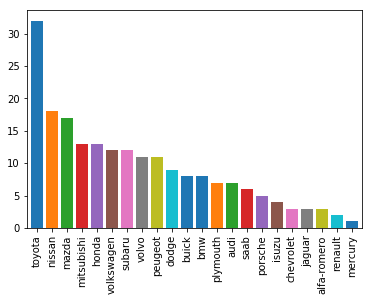

In [20]:
#Number of cars
#toyota seems to be most preferred car - highest selling
x=CarPrice['Carcompany'].value_counts()
x.plot.bar(width=.8)

Inference:
    - Most number of cars from Toyota

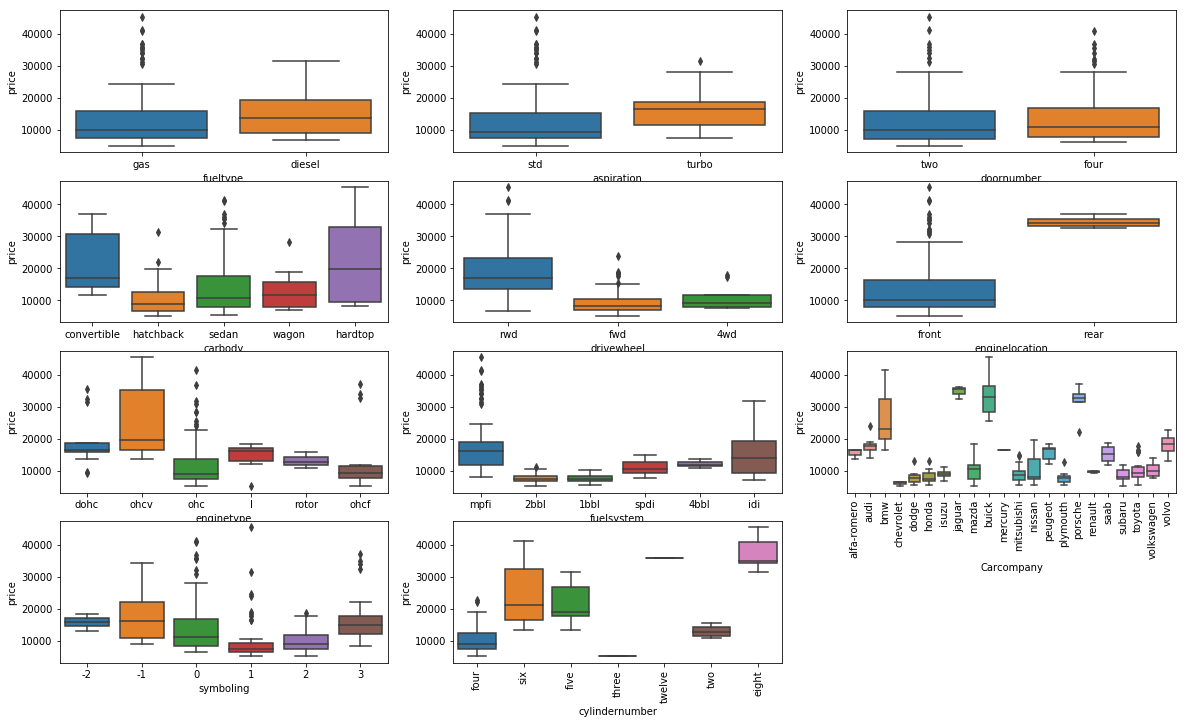

In [21]:
#Visualise for Categorical values

plt.figure(figsize=(20, 12))

plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)

plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(4,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(4,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(4,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.subplot(4,3,9)
sns.boxplot(x = 'Carcompany', y = 'price', data = CarPrice)
plt.xticks(rotation=90)
plt.subplot(4,3,10)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)
plt.subplot(4,3,11)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.xticks(rotation=90)

plt.show()


Inference: 
    - Aspiration "Turbo" has highst price average, eventhough "Std" has high end cars
    - Preferrable Carbody is "Sedan"
    - Drivewheel "rwd" is most preferrable
    - Enginlocation "Rear" has highest price starting range
    - Enginetype "ohcv" is high
    - Fuelsystem "idi" and "mpfi" is comparitively high
    - BMW,Buick,Porsche are high in price
    - Symboling 0,-1,1 are more, but 3 is also high which is low safety rated
    - Cylinder Number Six and eight are high

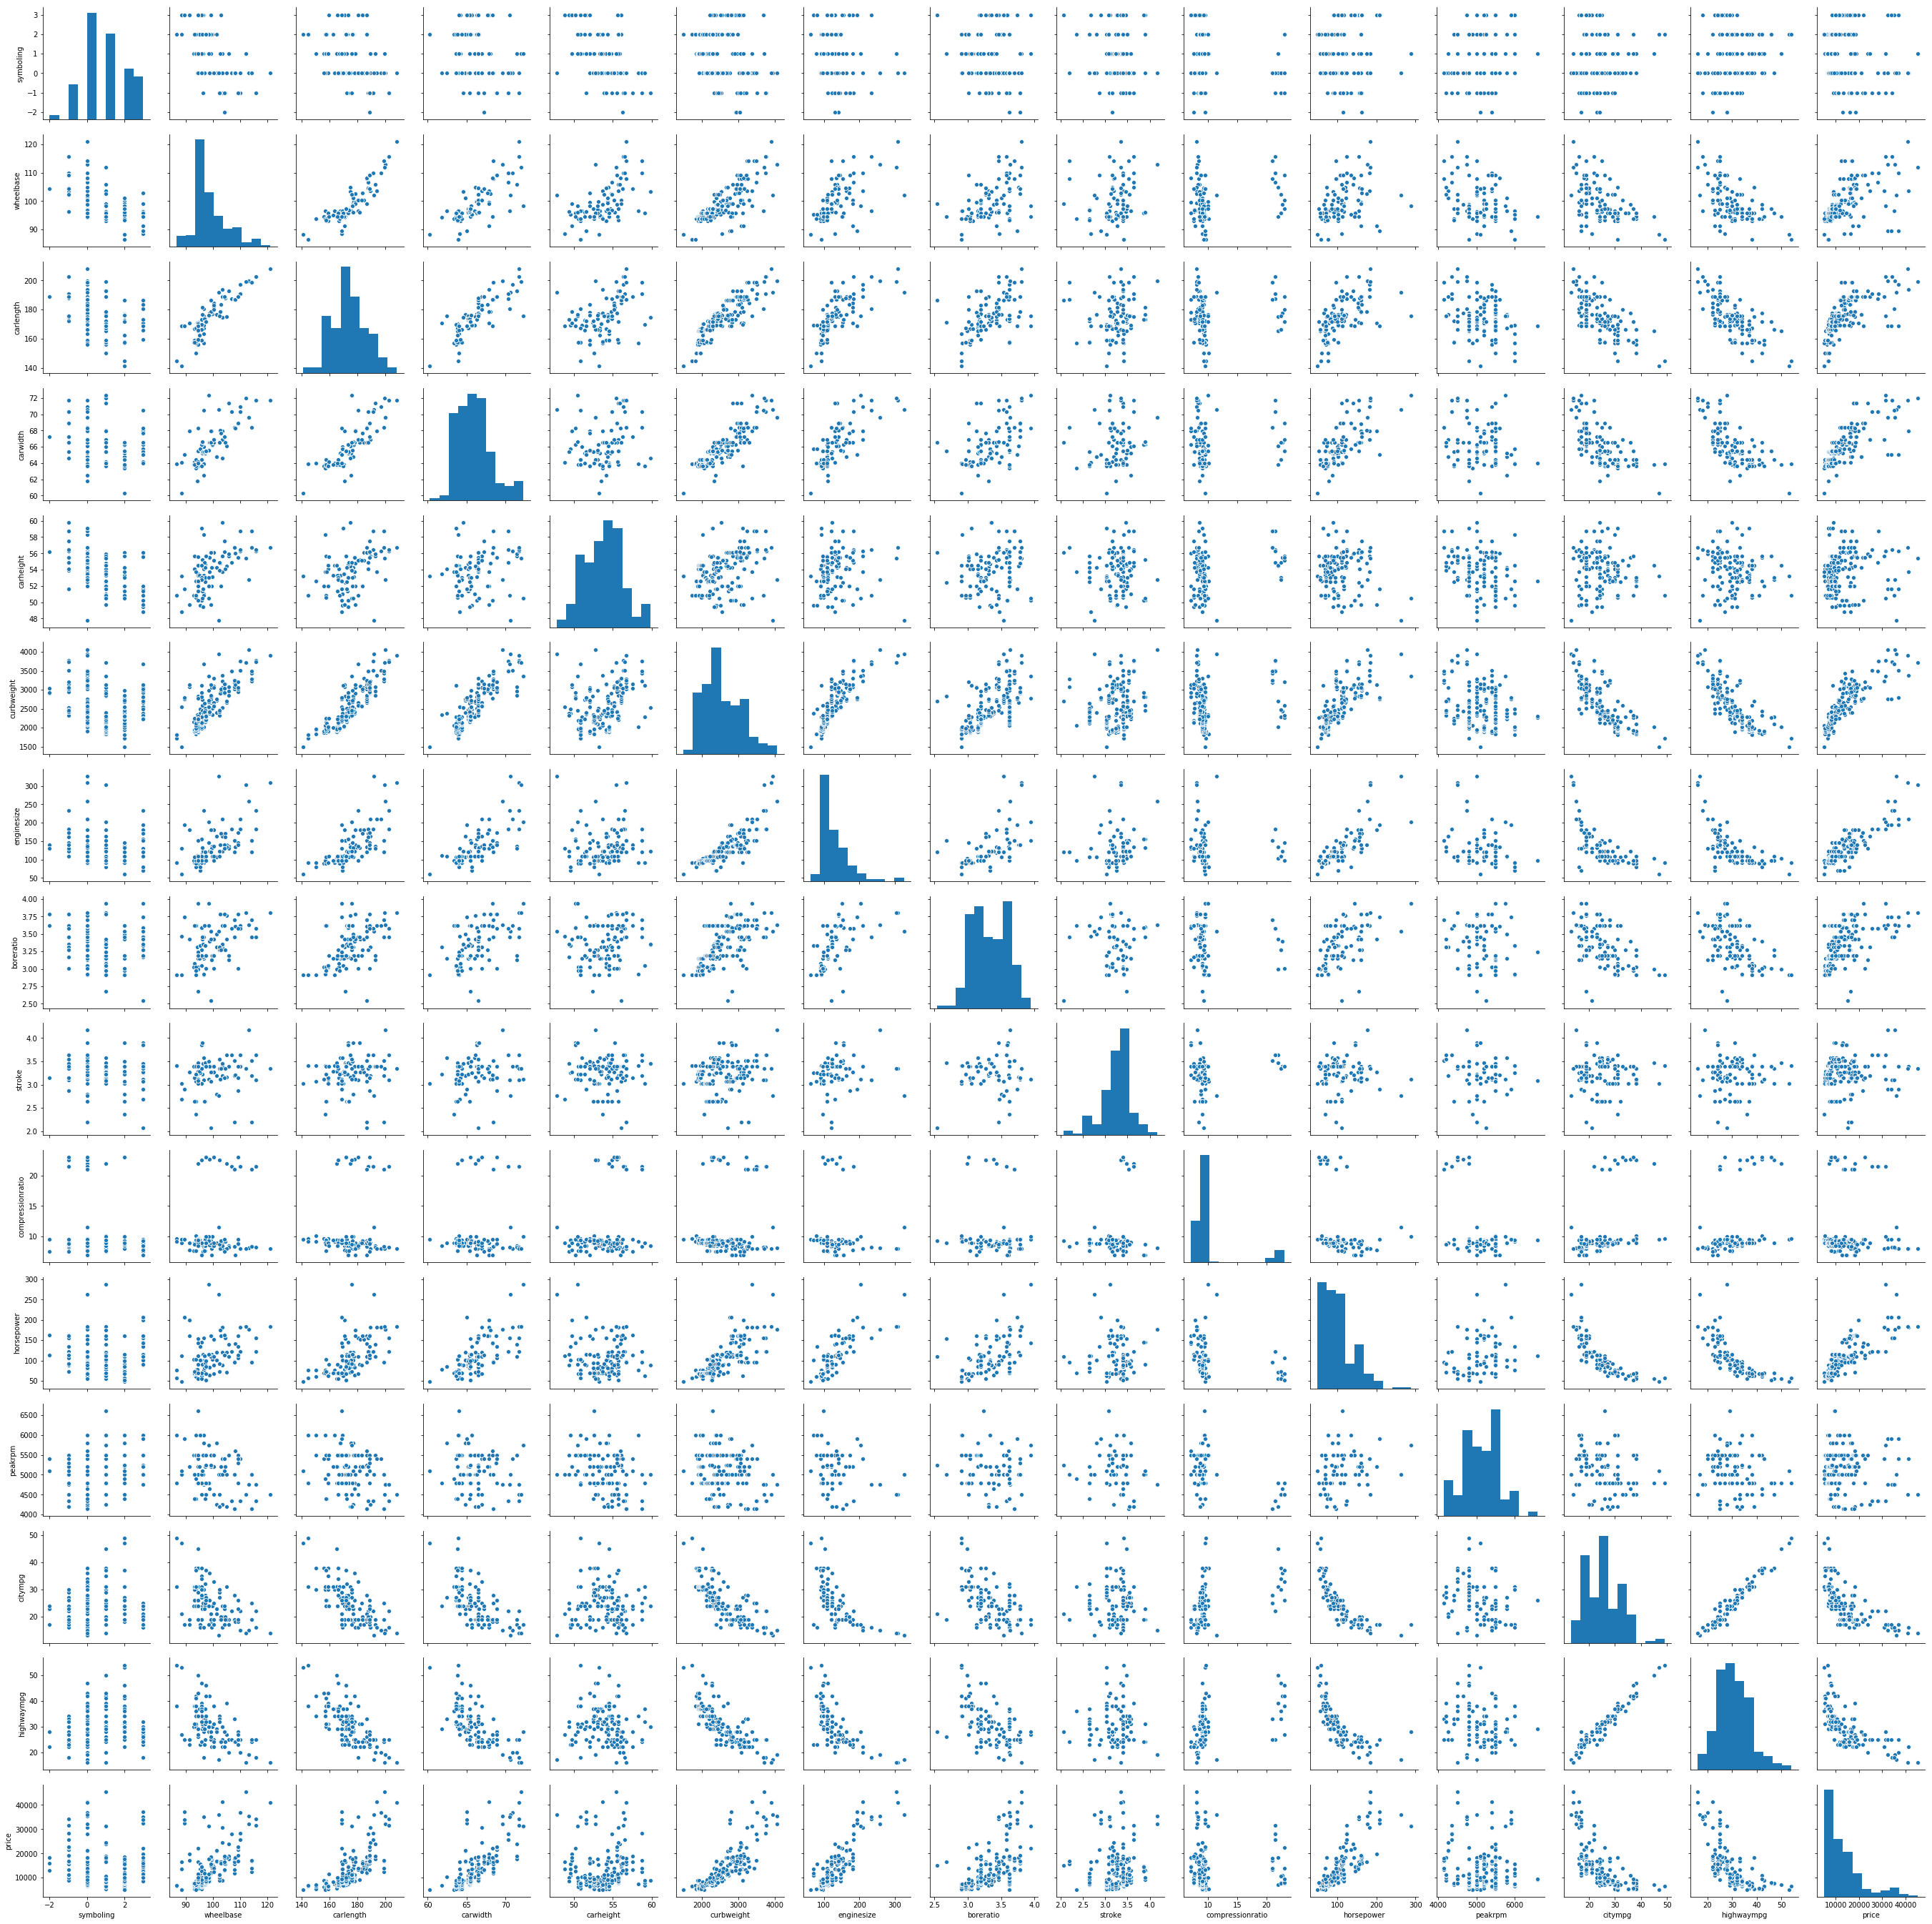

In [22]:
sns.pairplot(CarPrice)
plt.show()

# Data Preparation

In [23]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null category
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg 

In [24]:
#Label encoding for symboling ordinal category

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
CarPrice['symboling']=le.fit_transform(CarPrice['symboling'])


In [25]:
CarPrice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carcompany
0,5,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,5,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [26]:
#Derive new column by taking 55% of citympg and 45% of highwaympg (info:Google)
CarPrice['FuelEconomy']=CarPrice['citympg']*.55+CarPrice['highwaympg']*.45

In [27]:
#Dropping the city and highway columns
CarPrice.drop(['citympg','highwaympg'],inplace=True,axis=1)

In [28]:
CarPrice['BSratio']=CarPrice['boreratio']/CarPrice['stroke']   #information from Google

In [29]:
#Dropping the bore to stroke ration
CarPrice.drop(['boreratio','stroke'],inplace=True,axis=1)

In [30]:
#Vehicle acceleration performance based on horsepower and weight of the car - Google
CarPrice['HPWratio']=CarPrice['horsepower']/CarPrice['curbweight']

In [31]:
#Dropping the horsepower and curbweight columns
CarPrice.drop(['horsepower','curbweight'],inplace=True,axis=1)

In [32]:
#Date preparation for all other categorical values
CarPrice['fueltype']=CarPrice['fueltype'].map({'gas':1,'diesel':0})
CarPrice['aspiration']=CarPrice['aspiration'].map({'std':1,'turbo':0})
CarPrice['doornumber']=CarPrice['doornumber'].map({'two':1,'four':0})
CarPrice['enginelocation']=CarPrice['enginelocation'].map({'front':1,'rear':0})



In [33]:
CarPrice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,compressionratio,peakrpm,price,Carcompany,FuelEconomy,BSratio,HPWratio
0,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,four,130,mpfi,9.0,5000,13495.0,alfa-romero,23.70,1.294776,0.043564
1,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,four,130,mpfi,9.0,5000,16500.0,alfa-romero,23.70,1.294776,0.043564
2,3,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,six,152,mpfi,9.0,5000,16500.0,alfa-romero,22.15,0.772334,0.054552
3,4,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,four,109,mpfi,10.0,5500,13950.0,audi,26.70,0.938235,0.043646
4,4,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,five,136,mpfi,8.0,5500,17450.0,audi,19.80,0.938235,0.040722


# Data Preparation Categorical Values

In [34]:
body=pd.get_dummies(CarPrice['carbody'],prefix='Carbody',drop_first = True)
body.head()

,Carbody_hardtop,Carbody_hatchback,Carbody_sedan,Carbody_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [35]:
drivewheel=pd.get_dummies(CarPrice['drivewheel'],prefix='Drivwhl',drop_first = True)
drivewheel.head()

,Drivwhl_fwd,Drivwhl_rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [36]:
enginetype=pd.get_dummies(CarPrice['enginetype'],prefix='EngType',drop_first = True)
enginetype.head()

,EngType_l,EngType_ohc,EngType_ohcf,EngType_ohcv,EngType_rotor
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,1,0,0,0


In [37]:
fuelsys=pd.get_dummies(CarPrice['fuelsystem'],prefix='Fuelsys',drop_first = True)
fuelsys.head()

,Fuelsys_2bbl,Fuelsys_4bbl,Fuelsys_idi,Fuelsys_mpfi,Fuelsys_spdi
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [38]:
company=pd.get_dummies(CarPrice['Carcompany'],drop_first = True)
company.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
cylinder=pd.get_dummies(CarPrice['cylindernumber'],prefix='CylNum',drop_first = True)
cylinder.head()

,CylNum_five,CylNum_four,CylNum_six,CylNum_three,CylNum_twelve,CylNum_two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [40]:
CarPrice_m=pd.concat([CarPrice,cylinder,fuelsys,enginetype,drivewheel,body,company],axis=1)

In [41]:
CarPrice_m.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'compressionratio', 'peakrpm', 'price', 'Carcompany', 'FuelEconomy',
       'BSratio', 'HPWratio', 'CylNum_five', 'CylNum_four', 'CylNum_six',
       'CylNum_three', 'CylNum_twelve', 'CylNum_two', 'Fuelsys_2bbl',
       'Fuelsys_4bbl', 'Fuelsys_idi', 'Fuelsys_mpfi', 'Fuelsys_spdi',
       'EngType_l', 'EngType_ohc', 'EngType_ohcf', 'EngType_ohcv',
       'EngType_rotor', 'Drivwhl_fwd', 'Drivwhl_rwd', 'Carbody_hardtop',
       'Carbody_hatchback', 'Carbody_sedan', 'Carbody_wagon', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [42]:
#Drop all the columns as its not needed anymore
CarPrice_m.drop(['cylindernumber','fuelsystem','enginetype','drivewheel','carbody','Carcompany'],axis=1,inplace=True)


In [43]:
CarPrice_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
symboling            205 non-null int64
fueltype             205 non-null int64
aspiration           205 non-null int64
doornumber           205 non-null int64
enginelocation       205 non-null int64
wheelbase            205 non-null float64
carlength            205 non-null float64
carwidth             205 non-null float64
carheight            205 non-null float64
enginesize           205 non-null int64
compressionratio     205 non-null float64
peakrpm              205 non-null int64
price                205 non-null float64
FuelEconomy          205 non-null float64
BSratio              205 non-null float64
HPWratio             205 non-null float64
CylNum_five          205 non-null uint8
CylNum_four          205 non-null uint8
CylNum_six           205 non-null uint8
CylNum_three         205 non-null uint8
CylNum_twelve        205 non-null uint8
CylNum_two           205 non-null uin

# Splitting the Data into Training and Testing Sets


In [44]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(CarPrice_m, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()


In [47]:
num_vars = ["wheelbase","carlength","carwidth","carheight","enginesize","compressionratio","peakrpm","FuelEconomy","price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\pdhin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,3,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.139623,...,0,0,1,0,0,0,0,0,0,0
125,5,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.339623,...,0,0,0,1,0,0,0,0,0,0
166,3,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,5,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.260377,...,0,0,0,0,0,0,0,0,0,0
199,1,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.260377,...,0,0,0,0,0,0,0,0,0,1


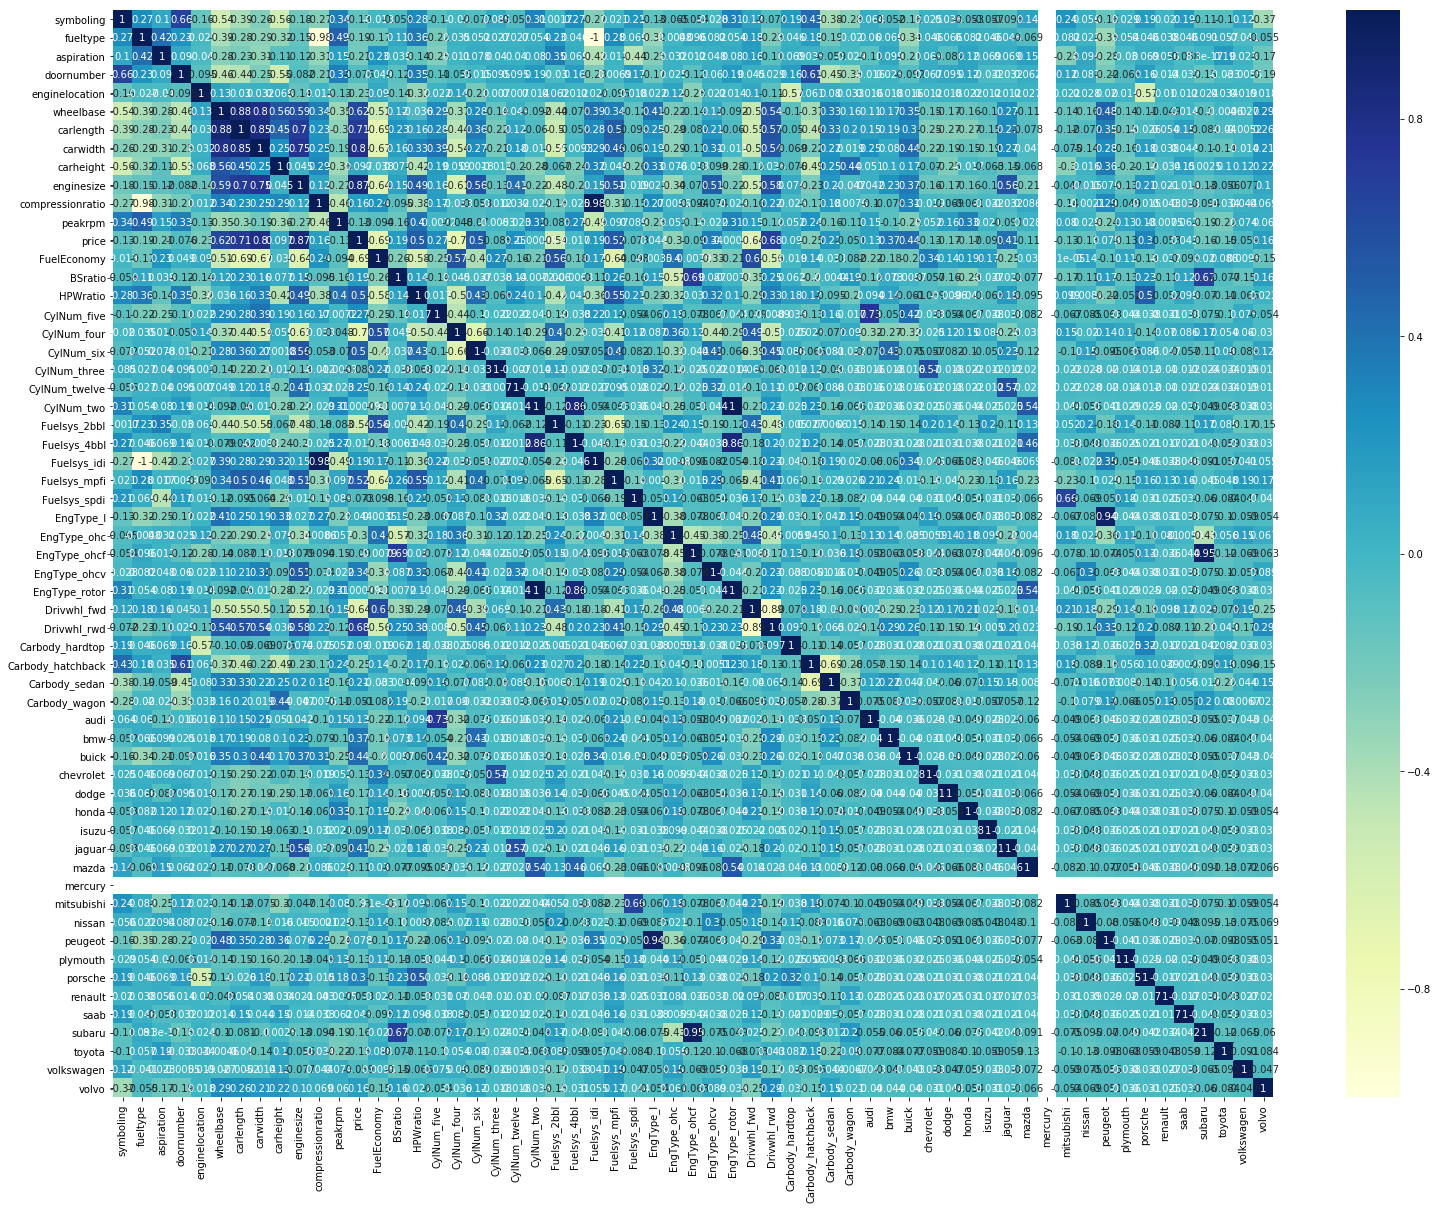

In [49]:
plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('price')
X_train = df_train

# Using RFE

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('fueltype', True, 1),
 ('aspiration', False, 12),
 ('doornumber', False, 34),
 ('enginelocation', True, 1),
 ('wheelbase', False, 18),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('enginesize', True, 1),
 ('compressionratio', True, 1),
 ('peakrpm', True, 1),
 ('FuelEconomy', False, 26),
 ('BSratio', False, 33),
 ('HPWratio', True, 1),
 ('CylNum_five', True, 1),
 ('CylNum_four', True, 1),
 ('CylNum_six', True, 1),
 ('CylNum_three', False, 17),
 ('CylNum_twelve', False, 24),
 ('CylNum_two', False, 14),
 ('Fuelsys_2bbl', False, 28),
 ('Fuelsys_4bbl', False, 10),
 ('Fuelsys_idi', True, 1),
 ('Fuelsys_mpfi', False, 39),
 ('Fuelsys_spdi', False, 30),
 ('EngType_l', False, 16),
 ('EngType_ohc', False, 23),
 ('EngType_ohcf', True, 1),
 ('EngType_ohcv', False, 13),
 ('EngType_rotor', False, 21),
 ('Drivwhl_fwd', False, 29),
 ('Drivwhl_rwd', False, 35),
 ('Carbody_hardtop', False, 25),
 ('Carbody_hatchback', False, 22),
 ('Carbody_se

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'enginesize',
       'compressionratio', 'peakrpm', 'HPWratio', 'CylNum_five', 'CylNum_four',
       'CylNum_six', 'Fuelsys_idi', 'EngType_ohcf', 'bmw', 'honda', 'mazda',
       'mitsubishi', 'nissan', 'peugeot', 'renault', 'subaru'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'FuelEconomy', 'BSratio', 'CylNum_three', 'CylNum_twelve',
       'CylNum_two', 'Fuelsys_2bbl', 'Fuelsys_4bbl', 'Fuelsys_mpfi',
       'Fuelsys_spdi', 'EngType_l', 'EngType_ohc', 'EngType_ohcv',
       'EngType_rotor', 'Drivwhl_fwd', 'Drivwhl_rwd', 'Carbody_hardtop',
       'Carbody_hatchback', 'Carbody_sedan', 'Carbody_wagon', 'audi', 'buick',
       'chevrolet', 'dodge', 'isuzu', 'jaguar', 'mercury', 'plymouth',
       'porsche', 'saab', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [56]:
X_train_rfe = X_train[col]

In [57]:
X_train_rfe.columns

Index(['fueltype', 'enginelocation', 'carwidth', 'enginesize',
       'compressionratio', 'peakrpm', 'HPWratio', 'CylNum_five', 'CylNum_four',
       'CylNum_six', 'Fuelsys_idi', 'EngType_ohcf', 'bmw', 'honda', 'mazda',
       'mitsubishi', 'nissan', 'peugeot', 'renault', 'subaru'],
      dtype='object')

# Building a linear model

In [58]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               0.356786
fueltype           -0.107256
enginelocation     -0.195930
carwidth            0.444376
enginesize          0.672916
compressionratio   -0.601501
peakrpm             0.141214
HPWratio           -1.172413
CylNum_five        -0.154133
CylNum_four        -0.140842
CylNum_six         -0.140781
Fuelsys_idi         0.464042
EngType_ohcf        0.259337
bmw                 0.248589
honda              -0.060367
mazda              -0.046047
mitsubishi         -0.104818
nissan             -0.041863
peugeot            -0.113917
renault            -0.149753
subaru             -0.293379
dtype: float64

In [59]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     93.23
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.63e-63
Time:                        22:59:08   Log-Likelihood:                 208.31
No. Observations:                 143   AIC:                            -378.6
Df Residuals:                     124   BIC:                            -322.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3568      0.069  

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
1,enginelocation,inf
11,EngType_ohcf,inf
10,Fuelsys_idi,inf
19,subaru,inf
4,compressionratio,52.790000
3,enginesize,5.510000
8,CylNum_four,5.450000
2,carwidth,4.420000
9,CylNum_six,3.820000


In [62]:
X=X_train_rfe.drop('HPWratio',1,)

In [63]:
X_train_lm=sm.add_constant(X)

lr_2=sm.OLS(y_train,X_train_lm).fit()

In [64]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     98.34
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.02e-64
Time:                        22:59:08   Log-Likelihood:                 207.53
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     125   BIC:                            -325.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3184      0.061  

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
1,enginelocation,inf
10,EngType_ohcf,inf
9,Fuelsys_idi,inf
18,subaru,inf
4,compressionratio,49.600000
7,CylNum_four,5.180000
3,enginesize,4.970000
2,carwidth,4.370000
8,CylNum_six,3.790000


In [66]:

X=X.drop('fueltype',1)

In [67]:
X_train_lm=sm.add_constant(X)

lr_3=sm.OLS(y_train,X_train_lm).fit()

In [68]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     98.34
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.02e-64
Time:                        22:59:09   Log-Likelihood:                 207.53
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     125   BIC:                            -325.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2352      0.053  

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,87.67
8,Fuelsys_idi,53.93
3,compressionratio,49.60
17,subaru,25.45
9,EngType_ohcf,24.20
6,CylNum_four,5.18
2,enginesize,4.97
1,carwidth,4.37
7,CylNum_six,3.79
5,CylNum_five,2.86


In [70]:

X=X.drop('enginelocation',1)

X_train_lm=sm.add_constant(X)

lr_4=sm.OLS(y_train,X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     98.34
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.02e-64
Time:                        22:59:09   Log-Likelihood:                 207.53
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     125   BIC:                            -325.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0143      0.048  

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,compressionratio,58.50
7,Fuelsys_idi,44.39
0,carwidth,30.35
1,enginesize,16.08
16,subaru,15.18
8,EngType_ohcf,14.58
3,peakrpm,8.76
5,CylNum_four,7.20
6,CylNum_six,3.24
4,CylNum_five,2.22


In [72]:

X=X.drop('compressionratio',1)

X_train_lm=sm.add_constant(X)

lr_5=sm.OLS(y_train,X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     94.23
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.40e-62
Time:                        22:59:09   Log-Likelihood:                 200.15
No. Observations:                 143   AIC:                            -366.3
Df Residuals:                     126   BIC:                            -315.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0796      0.042     -1.885   

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,29.81
1,enginesize,15.99
15,subaru,15.17
7,EngType_ohcf,14.56
2,peakrpm,7.42
4,CylNum_four,5.92
5,CylNum_six,3.21
3,CylNum_five,2.17
6,Fuelsys_idi,1.84
13,peugeot,1.60


In [74]:

X=X.drop('carwidth',1)

X_train_lm=sm.add_constant(X)

lr_6=sm.OLS(y_train,X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     68.93
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.83e-53
Time:                        22:59:10   Log-Likelihood:                 175.16
No. Observations:                 143   AIC:                            -318.3
Df Residuals:                     127   BIC:                            -270.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.048     -0.011   

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,subaru,13.42
6,EngType_ohcf,13.24
1,peakrpm,5.72
3,CylNum_four,5.55
0,enginesize,4.39
4,CylNum_six,3.20
5,Fuelsys_idi,1.75
2,CylNum_five,1.74
7,bmw,1.36
12,peugeot,1.34


In [76]:

X=X.drop('subaru',1)

X_train_lm=sm.add_constant(X)

lr_7=sm.OLS(y_train,X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     67.96
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.40e-52
Time:                        22:59:10   Log-Likelihood:                 169.40
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     128   BIC:                            -264.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0332      0.049     -0.676   

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,5.53
3,CylNum_four,5.37
0,enginesize,4.39
4,CylNum_six,3.17
5,Fuelsys_idi,1.74
2,CylNum_five,1.73
7,bmw,1.34
12,peugeot,1.34
8,honda,1.31
11,nissan,1.27


In [78]:
X=X.drop('mazda',1)

X_train_lm=sm.add_constant(X)

lr_8=sm.OLS(y_train,X_train_lm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     73.76
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.88e-53
Time:                        22:59:10   Log-Likelihood:                 169.40
No. Observations:                 143   AIC:                            -310.8
Df Residuals:                     129   BIC:                            -269.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0317      0.045     -0.704   

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,CylNum_four,5.37
1,peakrpm,5.06
0,enginesize,4.38
4,CylNum_six,3.15
2,CylNum_five,1.69
5,Fuelsys_idi,1.64
7,bmw,1.34
11,peugeot,1.32
8,honda,1.26
10,nissan,1.25


In [80]:
X=X.drop('CylNum_five',1)

X_train_lm=sm.add_constant(X)

lr_9=sm.OLS(y_train,X_train_lm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     80.37
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.70e-54
Time:                        22:59:11   Log-Likelihood:                 169.28
No. Observations:                 143   AIC:                            -312.6
Df Residuals:                     130   BIC:                            -274.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0410      0.040     -1.024   

In [81]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,4.29
2,CylNum_four,4.09
0,enginesize,3.87
3,CylNum_six,2.59
4,Fuelsys_idi,1.45
6,bmw,1.34
10,peugeot,1.30
7,honda,1.25
9,nissan,1.25
5,EngType_ohcf,1.21


In [82]:
X=X.drop('peugeot',1)

X_train_lm=sm.add_constant(X)

lr_10=sm.OLS(y_train,X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     87.90
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.53e-55
Time:                        22:59:11   Log-Likelihood:                 168.95
No. Observations:                 143   AIC:                            -313.9
Df Residuals:                     131   BIC:                            -278.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0442      0.040     -1.112   

In [83]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,4.22
2,CylNum_four,3.88
0,enginesize,3.82
3,CylNum_six,2.59
4,Fuelsys_idi,1.37
6,bmw,1.34
7,honda,1.25
9,nissan,1.23
5,EngType_ohcf,1.20
8,mitsubishi,1.15


In [84]:
X=X.drop('EngType_ohcf',1)

X_train_lm=sm.add_constant(X)

lr_11=sm.OLS(y_train,X_train_lm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     96.92
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.68e-56
Time:                        22:59:11   Log-Likelihood:                 168.63
No. Observations:                 143   AIC:                            -315.3
Df Residuals:                     132   BIC:                            -282.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0394      0.039     -1.004      

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,4.17
0,enginesize,3.81
2,CylNum_four,3.50
3,CylNum_six,2.56
4,Fuelsys_idi,1.34
5,bmw,1.33
6,honda,1.24
8,nissan,1.21
7,mitsubishi,1.13
9,renault,1.03


In [86]:
X=X.drop('renault',1)

X_train_lm=sm.add_constant(X)

lr_12=sm.OLS(y_train,X_train_lm).fit()

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.93e-56
Time:                        22:59:11   Log-Likelihood:                 166.67
No. Observations:                 143   AIC:                            -313.3
Df Residuals:                     133   BIC:                            -283.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0351      0.040     -0.888      

In [87]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,4.17
0,enginesize,3.79
2,CylNum_four,3.48
3,CylNum_six,2.56
4,Fuelsys_idi,1.33
5,bmw,1.33
6,honda,1.23
8,nissan,1.21
7,mitsubishi,1.13


In [88]:
X=X.drop('honda',1)

X_train_lm=sm.add_constant(X)

lr_13=sm.OLS(y_train,X_train_lm).fit()

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.01e-56
Time:                        22:59:11   Log-Likelihood:                 163.42
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     134   BIC:                            -282.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0120      0.039     -0.306      

In [89]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,3.79
0,enginesize,3.70
2,CylNum_four,3.47
3,CylNum_six,2.56
4,Fuelsys_idi,1.33
5,bmw,1.32
7,nissan,1.19
6,mitsubishi,1.11


In [90]:
X=X.drop('nissan',1)

X_train_lm=sm.add_constant(X)

lr_14=sm.OLS(y_train,X_train_lm).fit()

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.68e-55
Time:                        22:59:12   Log-Likelihood:                 159.62
No. Observations:                 143   AIC:                            -303.2
Df Residuals:                     135   BIC:                            -279.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0147      0.040     -0.367      

In [91]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,3.78
0,enginesize,3.68
2,CylNum_four,3.38
3,CylNum_six,2.40
4,Fuelsys_idi,1.33
5,bmw,1.30
6,mitsubishi,1.11


In [92]:
X=X.drop('mitsubishi',1)

X_train_lm=sm.add_constant(X)

lr_15=sm.OLS(y_train,X_train_lm).fit()

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.61e-55
Time:                        22:59:12   Log-Likelihood:                 157.49
No. Observations:                 143   AIC:                            -301.0
Df Residuals:                     136   BIC:                            -280.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0073      0.040     -0.182      

In [93]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,3.78
0,enginesize,3.67
2,CylNum_four,3.32
3,CylNum_six,2.40
4,Fuelsys_idi,1.32
5,bmw,1.30


In [94]:
#adding to check the R2 based on EDA
X=pd.concat([X,X_train[['Drivwhl_rwd']]],axis=1)

X_train_lm=sm.add_constant(X)

lr_16=sm.OLS(y_train,X_train_lm).fit()

print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.73e-58
Time:                        22:59:12   Log-Likelihood:                 166.00
No. Observations:                 143   AIC:                            -316.0
Df Residuals:                     135   BIC:                            -292.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0063      0.038     -0.166      

In [95]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.68
1,peakrpm,3.88
2,CylNum_four,3.48
6,Drivwhl_rwd,2.69
3,CylNum_six,2.41
4,Fuelsys_idi,1.42
5,bmw,1.33


In [96]:
#Adding based on EDA

X=pd.concat([X,X_train[['EngType_ohcf']]],axis=1)

X_train_lm=sm.add_constant(X)

lr_17=sm.OLS(y_train,X_train_lm).fit()

print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.19e-57
Time:                        22:59:12   Log-Likelihood:                 168.06
No. Observations:                 143   AIC:                            -318.1
Df Residuals:                     134   BIC:                            -291.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0201      0.038     -0.523   

In [97]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.73
1,peakrpm,3.95
2,CylNum_four,3.72
6,Drivwhl_rwd,2.71
3,CylNum_six,2.43
4,Fuelsys_idi,1.44
5,bmw,1.34
7,EngType_ohcf,1.16


In [98]:
#Dropping again as it does seem to change much and also P value is more

X=X.drop('EngType_ohcf',1)
X_train_lm=sm.add_constant(X)

lr_18=sm.OLS(y_train,X_train_lm).fit()

print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.73e-58
Time:                        22:59:12   Log-Likelihood:                 166.00
No. Observations:                 143   AIC:                            -316.0
Df Residuals:                     135   BIC:                            -292.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0063      0.038     -0.166      

In [99]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.68
1,peakrpm,3.88
2,CylNum_four,3.48
6,Drivwhl_rwd,2.69
3,CylNum_six,2.41
4,Fuelsys_idi,1.42
5,bmw,1.33


# Residual Analysis of the train data

In [100]:
y_train_price=lr_18.predict(X_train_lm)

Text(0.5, 0, 'Errors')

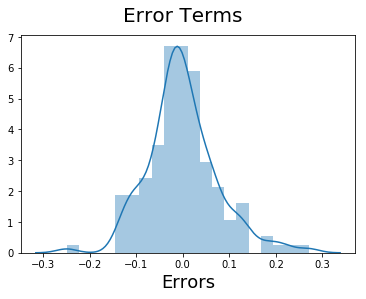

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions Using the Final Model

In [102]:
num_vars = ["wheelbase","carlength","carwidth","carheight","enginesize","compressionratio","peakrpm","FuelEconomy","price"]


df_test[num_vars] = scaler.transform(df_test[num_vars])

In [103]:

df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2.919355,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.265673,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.162820,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.067925,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.177358,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.226415,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.316038,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.932075,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing x test and ytest

In [104]:
y_test = df_test.pop('price')
X_test = df_test

In [105]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [106]:
X_test_lm=X_test_lm[X_train_lm.columns]

In [107]:
X_test_lm.columns

Index(['const', 'enginesize', 'peakrpm', 'CylNum_four', 'CylNum_six',
       'Fuelsys_idi', 'bmw', 'Drivwhl_rwd'],
      dtype='object')

In [108]:
# Making predictions 

y_pred_lm = lr_18.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

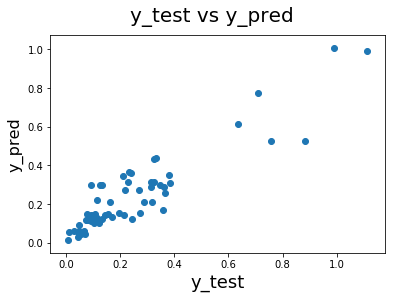

In [109]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm)

0.8378871471704508

Predictions:
    -> The below variables can be used for fixing the price and prediction
            enginesize
            peakrpm
            CylNum_four
            Drivwhl_rwd
            CylNum_six
            Fuelsys_idi
            bmw
            